In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('D:\DL\Jose portila Dl\TF_2_Notebooks_and_Data\DATA\cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

<AxesSubplot:>

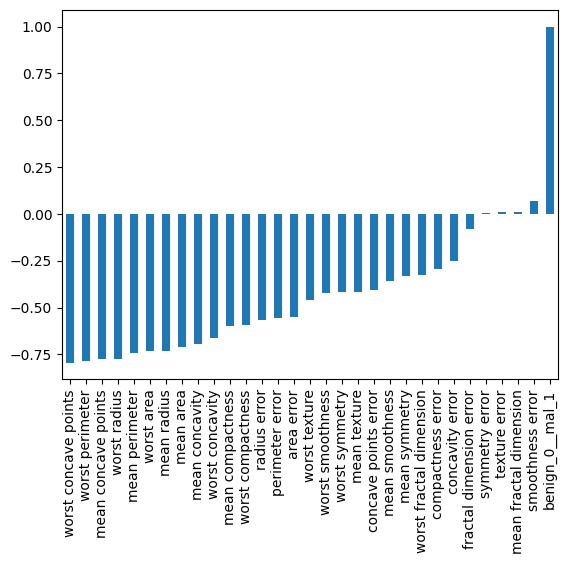

In [6]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='worst concave points', ylabel='worst perimeter'>

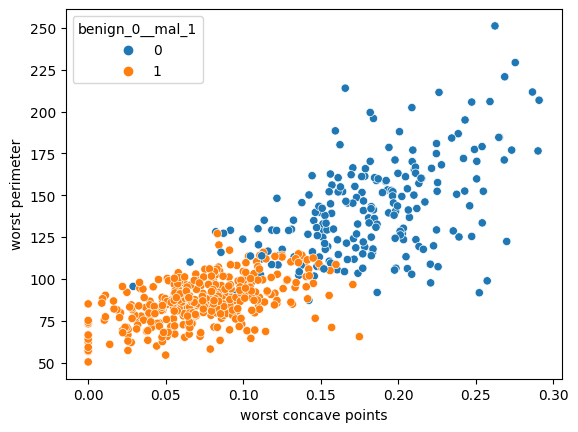

In [7]:
sns.scatterplot(x = 'worst concave points' , y = 'worst perimeter' , data = df , hue = 'benign_0__mal_1')

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='mean radius'>

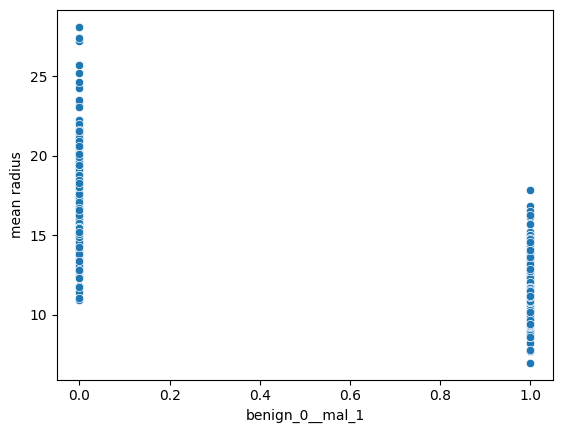

In [8]:
sns.scatterplot(x ='benign_0__mal_1' , y = 'mean radius' , data =df )

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('benign_0__mal_1' , axis =1).values

In [11]:
y = df['benign_0__mal_1'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaled_X_train = scaler.fit_transform(X_train)

In [16]:
scaled_X_test = scaler.transform(X_test)

# Callback

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
model = Sequential()
model.add(Dense(30 , activation='relu'))
model.add(Dense(15 , activation='relu'))

model.add(Dense(1 , activation='sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam')

In [19]:
model.fit(scaled_X_train , y_train, epochs = 600 , validation_data=(scaled_X_test , y_test) , verbose =1)

Epoch 1/600
14/14 [==============================] - 3s 52ms/step - loss: 0.6856 - val_loss: 0.6741
Epoch 2/600
14/14 [==============================] - 0s 23ms/step - loss: 0.6599 - val_loss: 0.6447
Epoch 3/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6240 - val_loss: 0.6016
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5784 - val_loss: 0.5496
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5282 - val_loss: 0.4942
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4735 - val_loss: 0.4384
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4222 - val_loss: 0.3865
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3756 - val_loss: 0.3416
Epoch 9/600
14/14 [==============================] - 0s 11ms/step - loss: 0.3359 - val_loss: 0.3075
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3033 - val_loss: 0.2743
Epoch

14/14 [==============================] - 0s 8ms/step - loss: 0.0499 - val_loss: 0.1103
Epoch 83/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0497 - val_loss: 0.1117
Epoch 84/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0501 - val_loss: 0.1130
Epoch 85/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0519 - val_loss: 0.1117
Epoch 86/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0489 - val_loss: 0.1142
Epoch 87/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0506 - val_loss: 0.1131
Epoch 88/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0522 - val_loss: 0.1116
Epoch 89/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0496 - val_loss: 0.1125
Epoch 90/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0472 - val_loss: 0.1111
Epoch 91/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0475 - val_loss: 0.1134
Epoch 9

Epoch 163/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0362 - val_loss: 0.1266
Epoch 164/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0379 - val_loss: 0.1194
Epoch 165/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0401 - val_loss: 0.1265
Epoch 166/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0374 - val_loss: 0.1270
Epoch 167/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0355 - val_loss: 0.1209
Epoch 168/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0363 - val_loss: 0.1303
Epoch 169/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0353 - val_loss: 0.1224
Epoch 170/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0362 - val_loss: 0.1274
Epoch 171/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0346 - val_loss: 0.1185
Epoch 172/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0356 - 

14/14 [==============================] - 0s 6ms/step - loss: 0.0309 - val_loss: 0.1330
Epoch 244/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0349 - val_loss: 0.1416
Epoch 245/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0289 - val_loss: 0.1326
Epoch 246/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0290 - val_loss: 0.1328
Epoch 247/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0282 - val_loss: 0.1334
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0300 - val_loss: 0.1339
Epoch 249/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0305 - val_loss: 0.1342
Epoch 250/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0290 - val_loss: 0.1354
Epoch 251/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0301 - val_loss: 0.1343
Epoch 252/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0290 - val_loss: 0.133

14/14 [==============================] - 0s 14ms/step - loss: 0.0215 - val_loss: 0.1419
Epoch 325/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0204 - val_loss: 0.1546
Epoch 326/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0251 - val_loss: 0.1467
Epoch 327/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0238 - val_loss: 0.1461
Epoch 328/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0237 - val_loss: 0.1476
Epoch 329/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0239 - val_loss: 0.1412
Epoch 330/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0256 - val_loss: 0.1484
Epoch 331/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0230 - val_loss: 0.1464
Epoch 332/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0202 - val_loss: 0.1510
Epoch 333/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0198 - val_loss: 0.

Epoch 405/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0162 - val_loss: 0.1656
Epoch 406/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0154 - val_loss: 0.1600
Epoch 407/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0158 - val_loss: 0.1633
Epoch 408/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0144 - val_loss: 0.1563
Epoch 409/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0141 - val_loss: 0.1772
Epoch 410/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0191 - val_loss: 0.1543
Epoch 411/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0170 - val_loss: 0.1832
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0173 - val_loss: 0.1675
Epoch 413/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0147 - val_loss: 0.1684
Epoch 414/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0149 - val

14/14 [==============================] - 0s 8ms/step - loss: 0.0135 - val_loss: 0.1926
Epoch 486/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0121 - val_loss: 0.1911
Epoch 487/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.1981
Epoch 488/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0113 - val_loss: 0.2049
Epoch 489/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0120 - val_loss: 0.1854
Epoch 490/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0137 - val_loss: 0.2072
Epoch 491/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0128 - val_loss: 0.1868
Epoch 492/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0119 - val_loss: 0.1927
Epoch 493/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0110 - val_loss: 0.2020
Epoch 494/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0106 - val_loss: 0.1937

Epoch 566/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0079 - val_loss: 0.2464
Epoch 567/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0071 - val_loss: 0.2211
Epoch 568/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0072 - val_loss: 0.2465
Epoch 569/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.2259
Epoch 570/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.2279
Epoch 571/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.2367
Epoch 572/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.2311
Epoch 573/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.2553
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0099 - val_loss: 0.2164
Epoch 575/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0075 - val_los

In [20]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

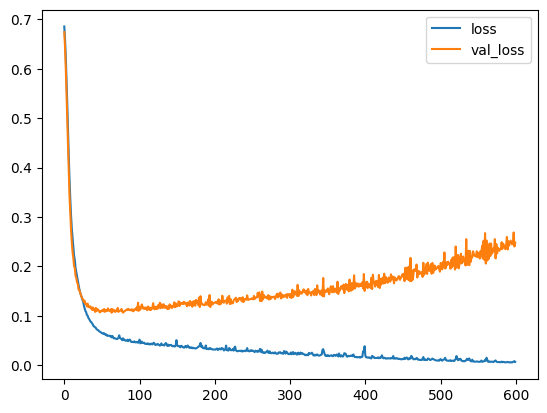

In [21]:
losses.plot()

In [22]:
new_model = Sequential()
new_model.add(Dense(30 , activation='relu'))
new_model.add(Dense(15 , activation='relu'))

new_model.add(Dense(1 , activation='sigmoid'))

new_model.compile(loss = 'binary_crossentropy' , optimizer = 'adam')

In [23]:
early_stop = EarlyStopping(monitor='val_loss' , mode = 'min' , patience = 25)

In [24]:
new_model.fit(scaled_X_train, y_train, epochs =600 , validation_data=(scaled_X_test, y_test), callbacks=[early_stop] )

Epoch 1/600
14/14 [==============================] - 2s 19ms/step - loss: 0.7028 - val_loss: 0.6740
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6593 - val_loss: 0.6378
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6212 - val_loss: 0.6034
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5835 - val_loss: 0.5635
Epoch 5/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5393 - val_loss: 0.5130
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4918 - val_loss: 0.4628
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4431 - val_loss: 0.4144
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3970 - val_loss: 0.3665
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3543 - val_loss: 0.3275
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3184 - val_loss: 0.2881
Epoch 

In [25]:
new_losses = pd.DataFrame(new_model.history.history)

<AxesSubplot:>

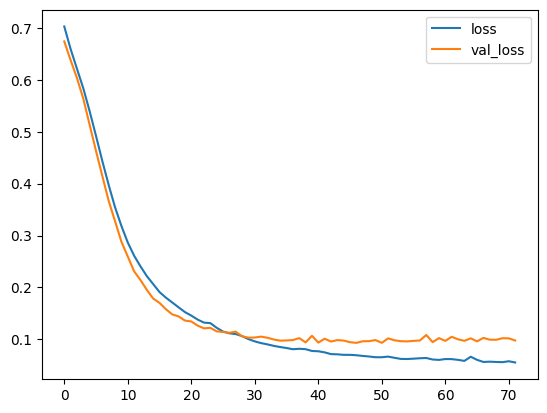

In [26]:
new_losses.plot()

# Dropout Technique

In [27]:
from tensorflow.keras.layers import Dropout

In [28]:
dp_model = Sequential()
dp_model.add(Dense(30 , activation='relu'))
dp_model.add(Dropout(rate = 0.5))

dp_model.add(Dense(15 , activation='relu'))
dp_model.add(Dropout(rate = 0.5))

dp_model.add(Dense(1 , activation='sigmoid'))

dp_model.compile(loss = 'binary_crossentropy' , optimizer = 'adam')

In [29]:
dp_model.fit(scaled_X_train, y_train, epochs =600 , callbacks=[early_stop] ,
             validation_data=(scaled_X_test, y_test) , verbose =1)

Epoch 1/600
14/14 [==============================] - 2s 40ms/step - loss: 0.7223 - val_loss: 0.6608
Epoch 2/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6881 - val_loss: 0.6514
Epoch 3/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6648 - val_loss: 0.6375
Epoch 4/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6417 - val_loss: 0.6159
Epoch 5/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6345 - val_loss: 0.5942
Epoch 6/600
14/14 [==============================] - 0s 17ms/step - loss: 0.6041 - val_loss: 0.5722
Epoch 7/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5940 - val_loss: 0.5461
Epoch 8/600
14/14 [==============================] - 0s 12ms/step - loss: 0.5758 - val_loss: 0.5235
Epoch 9/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5523 - val_loss: 0.4969
Epoch 10/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5566 - val_loss: 0.4761

14/14 [==============================] - 0s 9ms/step - loss: 0.1443 - val_loss: 0.1055
Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1478 - val_loss: 0.1026
Epoch 84/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1663 - val_loss: 0.1081
Epoch 85/600
14/14 [==============================] - 0s 11ms/step - loss: 0.1463 - val_loss: 0.1033
Epoch 86/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1448 - val_loss: 0.0991
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1421 - val_loss: 0.1017
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1308 - val_loss: 0.1029
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1499 - val_loss: 0.0991
Epoch 90/600
14/14 [==============================] - 0s 11ms/step - loss: 0.1352 - val_loss: 0.0965
Epoch 91/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1239 - val_loss: 0.1077
Epoch 92/60

In [30]:
dp_losses = pd.DataFrame(dp_model.history.history)

<AxesSubplot:>

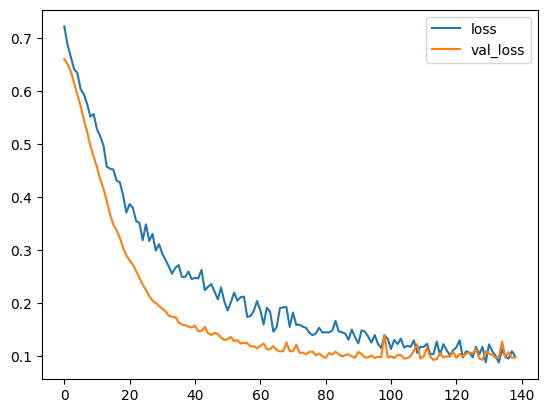

In [31]:
dp_losses.plot()

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
y_pred_1 = (model.predict(scaled_X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [40]:
print(classification_report(y_test , y_pred_1))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [41]:
y_pred_2 = (dp_model.predict(scaled_X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [42]:
print(classification_report(y_test , y_pred_2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
x = np.array([[1,27,3,4] , [3,6,89,2]])
np.max(x , axis=-1)